In [1]:
import amrlib
import spacy
amrlib.setup_spacy_extension()
nlp = spacy.load('en_core_web_sm')
doc = nlp('In 2021, doctors prevented the spread of the virus by vaccinating with Pfizer.')

# The following are roughly equivalent but demonstrate the different objects.
graphs = doc._.to_amr()
graphs

['# ::snt In 2021, doctors prevented the spread of the virus by vaccinating with Pfizer.\n(p / prevent-01\n      :ARG0 (d / doctor)\n      :ARG1 (s / spread-03\n            :ARG1 (v / virus))\n      :ARG3 (v2 / vaccinate-01\n            :ARG0 d\n            :ARG1 (c / company\n                  :name (n / name\n                        :op1 "Pfizer")))\n      :time (d2 / date-entity\n            :year 2021))']

In [2]:
!ls /home/iseratho/miniconda3/lib/python3.9/site-packages/amrlib/models/parse_xfm/

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
__init__.py  amr_trainer.py  penman_serializer.py
__pycache__  inference.py    trainer.py


In [3]:
print(graphs[0])

# ::snt In 2021, doctors prevented the spread of the virus by vaccinating with Pfizer.
(p / prevent-01
      :ARG0 (d / doctor)
      :ARG1 (s / spread-03
            :ARG1 (v / virus))
      :ARG3 (v2 / vaccinate-01
            :ARG0 d
            :ARG1 (c / company
                  :name (n / name
                        :op1 "Pfizer")))
      :time (d2 / date-entity
            :year 2021))


In [4]:
import penman

graph = penman.decode(graphs[0])
triples = graph.triples
triples

[('p', ':instance', 'prevent-01'),
 ('p', ':ARG0', 'd'),
 ('d', ':instance', 'doctor'),
 ('p', ':ARG1', 's'),
 ('s', ':instance', 'spread-03'),
 ('s', ':ARG1', 'v'),
 ('v', ':instance', 'virus'),
 ('p', ':ARG3', 'v2'),
 ('v2', ':instance', 'vaccinate-01'),
 ('v2', ':ARG0', 'd'),
 ('v2', ':ARG1', 'c'),
 ('c', ':instance', 'company'),
 ('c', ':name', 'n'),
 ('n', ':instance', 'name'),
 ('n', ':op1', '"Pfizer"'),
 ('p', ':time', 'd2'),
 ('d2', ':instance', 'date-entity'),
 ('d2', ':year', '2021')]

In [5]:
graph.instances()

[Instance(source='p', role=':instance', target='prevent-01'),
 Instance(source='d', role=':instance', target='doctor'),
 Instance(source='s', role=':instance', target='spread-03'),
 Instance(source='v', role=':instance', target='virus'),
 Instance(source='v2', role=':instance', target='vaccinate-01'),
 Instance(source='c', role=':instance', target='company'),
 Instance(source='n', role=':instance', target='name'),
 Instance(source='d2', role=':instance', target='date-entity')]

In [6]:
graph.edges()

[Edge(source='p', role=':ARG0', target='d'),
 Edge(source='p', role=':ARG1', target='s'),
 Edge(source='s', role=':ARG1', target='v'),
 Edge(source='p', role=':ARG3', target='v2'),
 Edge(source='v2', role=':ARG0', target='d'),
 Edge(source='v2', role=':ARG1', target='c'),
 Edge(source='c', role=':name', target='n'),
 Edge(source='p', role=':time', target='d2')]

In [7]:
graph.attributes()

[Attribute(source='n', role=':op1', target='"Pfizer"'),
 Attribute(source='d2', role=':year', target='2021')]

In [8]:
import networkx as nx

g = nx.DiGraph()

In [9]:
edge_label_dict = {}
for s, r, t in triples:
    g.add_edge(s, t, **{"role": r})
    edge_label_dict[(s, t)] = r

In [10]:
nx.is_directed_acyclic_graph(g)

True

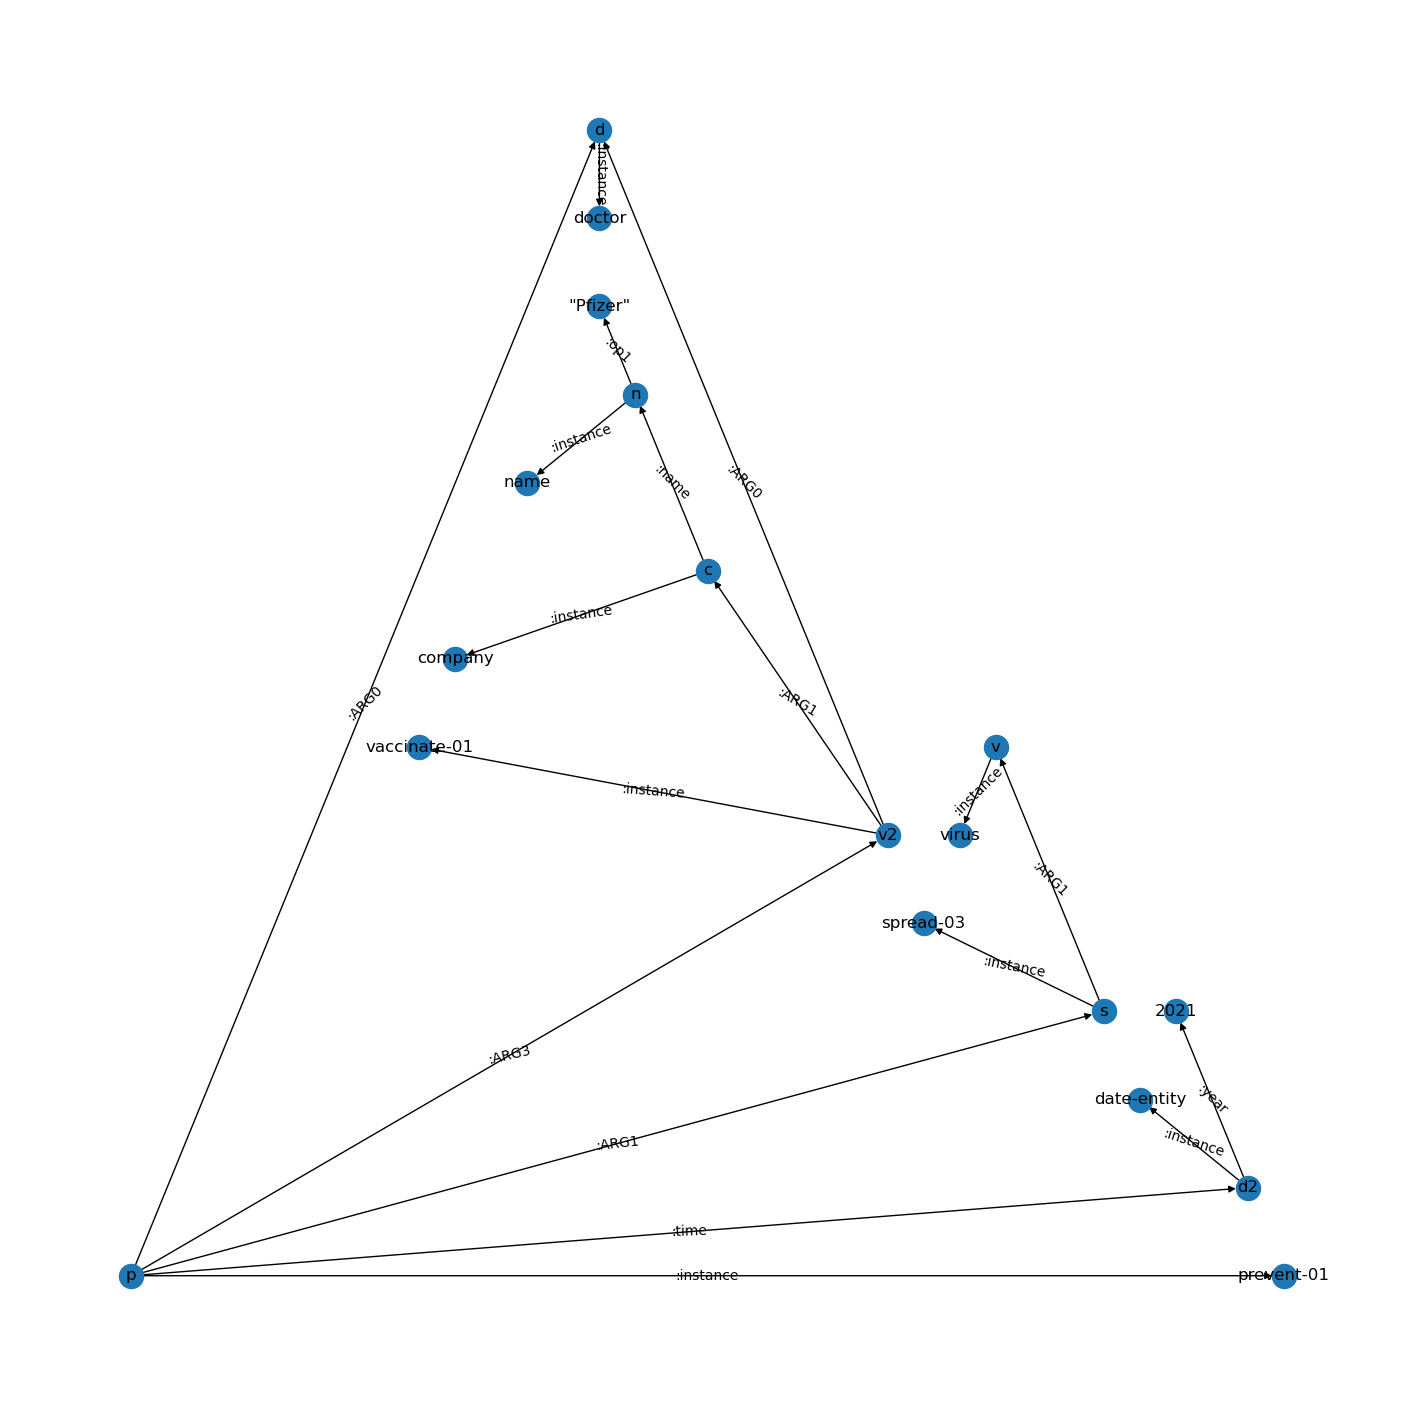

In [11]:
# pos = nx.draw_circular(g)
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))

pos = nx.planar_layout(g)
nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=edge_label_dict)
nx.draw(g, pos, with_labels=True)